# **Case Study: How Can a Wellness Technology Company Play It Smart?**

## About the company
Bellabeat is a high-tech company that manufactures health-focused smart products. It products work by collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. The owner believes that Bellabeat’s available consumer data would reveal more opportunities for growth and reveal areas in which to market the product more effectively.

## Task
Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.


Three questions will guide the future marketing program:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?3. How could these trends help influence Bellabeat marketing strategy?

## <span style="color:red"> Prepare </span>

### Import required packages

In [1]:
library(tidyverse)
library(ggplot2)
library(janitor)
library(readr)
library(here)
library(lubridate)
library(tidyr)
library(reshape2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


here() starts at /kaggle/working


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




### Import Datasets

In [2]:
daily_activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")


calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**Checking Datasets**

In [3]:
head(daily_activity)
glimpse(daily_activity)

head(sleep)
glimpse(sleep)

head(calories)
glimpse(calories)

head(intensities)
glimpse(intensities)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ Calories     <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, …


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


Rows: 22,099
Columns: 4
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityHour     <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/1…
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…


After inspection the Weight Log only had 8 participants which was not enough to justify and business decisions made using its information. Additionally the date time required reformatting as well as seperation for future anaylsis. 

**Correcting Date and Time formatting**

In [4]:
# intensities
intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")
# calories
calories$ActivityHour=as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")
# daily activity
daily_activity$ActivityDate=as.POSIXct(daily_activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
daily_activity$date <- format(daily_activity$ActivityDate, format = "%m/%d/%y")
daily_activity$month <- format(daily_activity$ActivityDate, format = "%b")
daily_activity$day <- format(daily_activity$ActivityDate, format = "%A")
# sleep
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")
sleep$month <- format(sleep$SleepDay, format = "%b")
sleep$day <- format(sleep$SleepDay, format = "%A")

**Checking for duplicated or incomplete data inputs**

In [5]:
sum(duplicated(daily_activity))
sum(is.na(daily_activity))
sum(duplicated(sleep))
sum(is.na(sleep))

[1] 0

[1] 0

[1] 3

[1] 0

**Remove duplicates in 'sleep' dataframe**

In [6]:
sleep <- distinct(sleep)

**Create new day of the week columns in both dataframes**

In [7]:
daily_activity %>%
  select(c("TotalSteps", "TotalDistance", "VeryActiveDistance", "ModeratelyActiveDistance", "LightActiveDistance", "SedentaryActiveDistance")) %>%
summary(daily_activity)

   TotalSteps    TotalDistance    VeryActiveDistance ModeratelyActiveDistance
 Min.   :    0   Min.   : 0.000   Min.   : 0.000     Min.   :0.0000          
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 0.000     1st Qu.:0.0000          
 Median : 7406   Median : 5.245   Median : 0.210     Median :0.2400          
 Mean   : 7638   Mean   : 5.490   Mean   : 1.503     Mean   :0.5675          
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 2.053     3rd Qu.:0.8000          
 Max.   :36019   Max.   :28.030   Max.   :21.920     Max.   :6.4800          
 LightActiveDistance SedentaryActiveDistance
 Min.   : 0.000      Min.   :0.000000       
 1st Qu.: 1.945      1st Qu.:0.000000       
 Median : 3.365      Median :0.000000       
 Mean   : 3.341      Mean   :0.001606       
 3rd Qu.: 4.782      3rd Qu.:0.000000       
 Max.   :10.710      Max.   :0.110000       

**Creation of left joined dataframe with daily_sleep and daily activity for ease of future visualisation**

In [8]:
sleep_master <- sleep %>%
  left_join(daily_activity, by=c('Id', 
             'date', 'day', 'month'))

**Setting order for days of the week for visualisation**

In [9]:
sleep_master$day <- factor(sleep_master$day, c("Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday", "Sunday"))

## <span style="color:red"> Analysis </span>

**Which Day of the Week Are Users Most Active?**

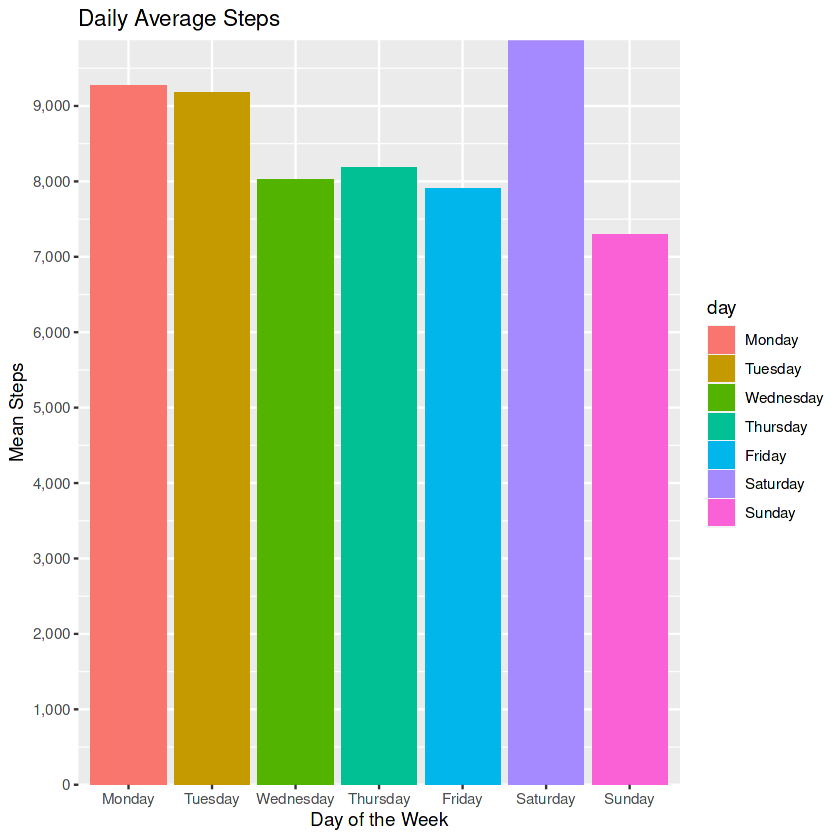

In [10]:
sleep_master %>%
  group_by(day) %>%
  summarise_at(vars(TotalSteps), list(mean_steps= mean)) %>%
  ggplot(aes(x= day, y = mean_steps, fill = day)) +
  geom_col() +
  scale_y_continuous(expand = c(0, 0), labels =  scales::comma, breaks = scales::pretty_breaks(n = 10)) +
  labs(title = "Daily Average Steps", x = "Day of the Week", y = "Mean Steps")

Users are more active during the start of the week and on Saturday and are least active on Sundays. It is worth noting that all days show an average amount of steps which is below the recommneded 10,00 steps a day. 
* To suppourt ballabeat users and to help improve their fitness reigme, motivational support through the app could be given to users on days where the average amount of steps is lower than usual.
* A target can be set on the application which encourages users to reach a daily target of 10,000 or more depending on the users goals.

**Do Users Find Certain Days Harder To Sleep?**

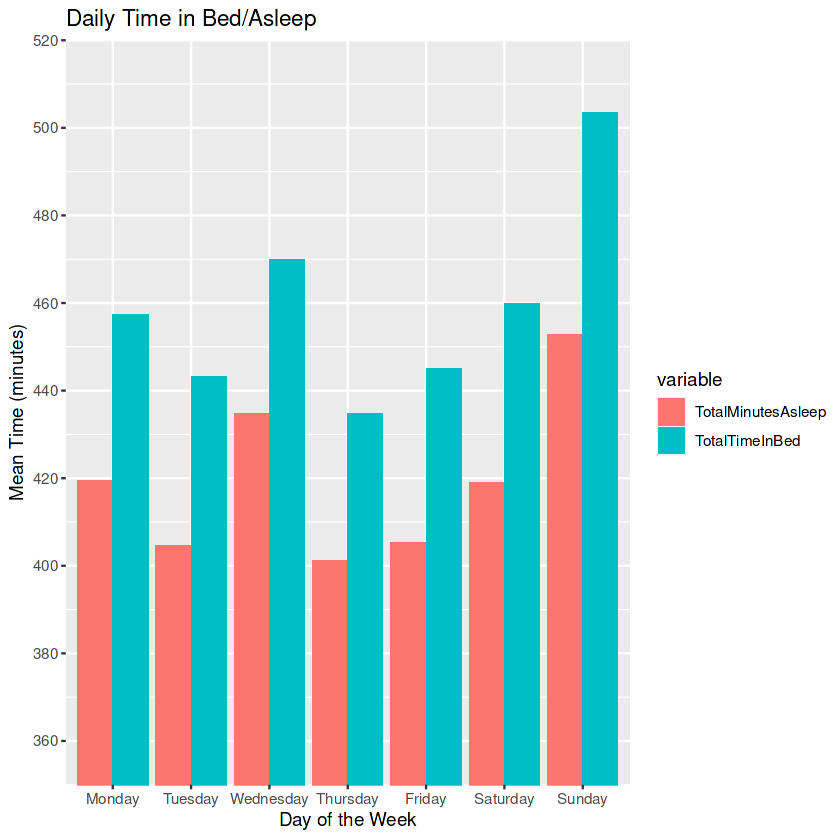

In [11]:
in_bed_sleep <- sleep_master %>%
  group_by(day) %>%
  summarise_at(c("TotalMinutesAsleep", "TotalTimeInBed"), mean, na.rm = TRUE)
         
in_bed_sleep_2 <- melt(in_bed_sleep, id.vars='day')

ggplot(in_bed_sleep_2, aes(x=day, y=value, fill=variable)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_continuous(limits = c(0, NA), expand = c(0, 0), breaks = scales::pretty_breaks(n = 10)) +
    labs(title = "Daily Time in Bed/Asleep", x = "Day of the Week", y = "Mean Time (minutes)") +
    coord_cartesian(ylim=c(350,520))

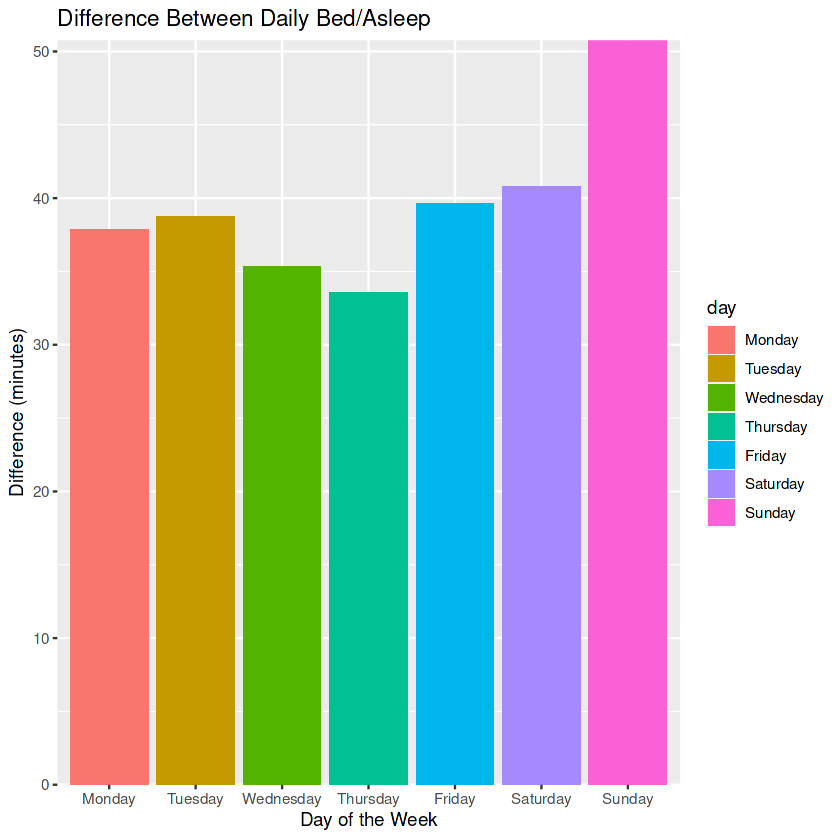

In [12]:
sleep_master %>%
  group_by(day) %>%
  summarise_at(c("TotalMinutesAsleep", "TotalTimeInBed"), mean, na.rm = TRUE) %>%
  mutate(diff = TotalTimeInBed - TotalMinutesAsleep) %>%
  ggplot(aes(x = day, y = diff, fill = day)) +
  geom_col() +
  scale_y_continuous(expand = c(0, 0)) +
  labs(title = "Difference Between Daily Bed/Asleep", x = "Day of the Week", y = "Difference (minutes)")


Refer to the above two plots there is little between each of the days and the difference between there time in bed and time asleep apart from Sunday. This could be in relation to it also being the day with the least average steps but it would require further research. 
* More research can be carried out by Bellabeat into the reasonings for the increase of restlessness on the shown days and advice given to users based on the results.
* Additional sleep support on the Bellabeat application used to improve users sleep.

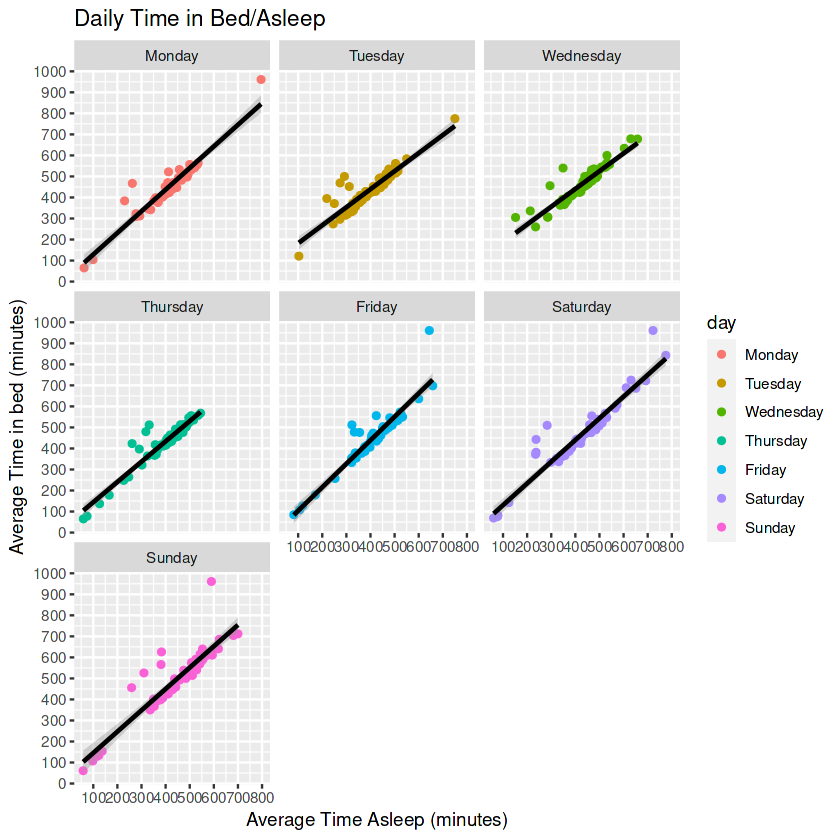

In [13]:
sleep_master %>%
  group_by(day) %>%
  ggplot(aes(x = TotalMinutesAsleep, y = TotalTimeInBed, colour = day)) +
  geom_point() +
  scale_x_continuous( breaks = scales::pretty_breaks(n = 10)) +
  scale_y_continuous( breaks = scales::pretty_breaks(n = 10)) +
  geom_smooth(color='black', method='lm', formula= y~x) +
  labs(title = "Daily Time in Bed/Asleep", x = "Average Time Asleep (minutes)", y = "Average Time in bed (minutes)") + 
  facet_wrap(~day)

**Is There a Relationship Between Active/Sedamentary Time and Sleep?**

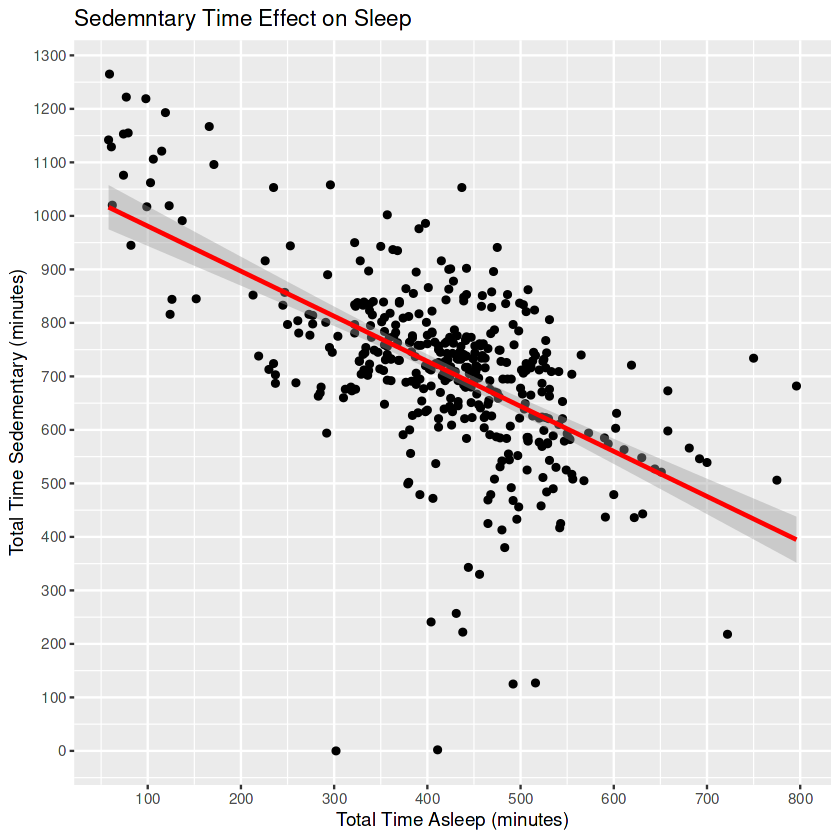

In [14]:
sleep_master %>%
  ggplot(aes(x = TotalMinutesAsleep, y = SedentaryMinutes)) +
  geom_point() +
  scale_x_continuous( breaks = scales::pretty_breaks(n = 10)) +
  scale_y_continuous( breaks = scales::pretty_breaks(n = 10)) +
  geom_smooth(color='red', method='lm', formula= y~x) +
  labs(title = "Sedemntary Time Effect on Sleep", x = "Total Time Asleep (minutes)", y = "Total Time Sedementary (minutes)") 

A correlation between the amount of sleep someone was able to have and the amount of time they were active was seen. As expected the more active someone was during the day the more time they would usually sleep. There are some outliers in this plot which make me cautious on the reliability of the data but the general trend line is clear.
* Encouragent given to Bellabeat app users to increase activity in order to improve sleep.

**When Are Users Most Active?**

Warning message in geom_histogram(stat = "identity", fill = "blue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


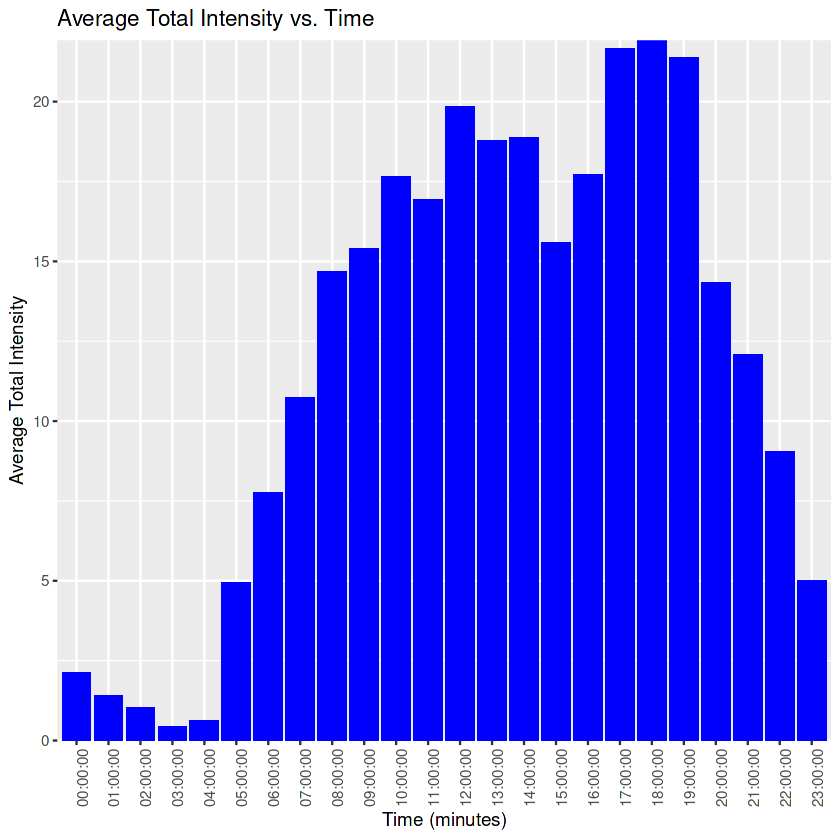

In [15]:
int_new <- intensities %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

ggplot(data=int_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='blue') +
  theme(axis.text.x = element_text(angle = 90)) +
  scale_y_continuous(expand = c(0, 0)) +
  labs(title="Average Total Intensity vs. Time", x = "Time (minutes)", y = "Average Total Intensity")

The average intensity is shown to fluctuate for the hpours during a standard lunch break (12:00 to 14:00) and straight after the standard working day (17:00 to 19:00). 
* Encouragement for more activity before work (09:00) and in the later hours of the evening (after 19:00) given to users to increase daily activity.
* Targetting app users with promotions at the peak times of use in order to get higher levels of response.
* Carrying out live events during high periods of activity in order to maximise ingagement with users.

Warning message in geom_histogram(stat = "identity", fill = "orange"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


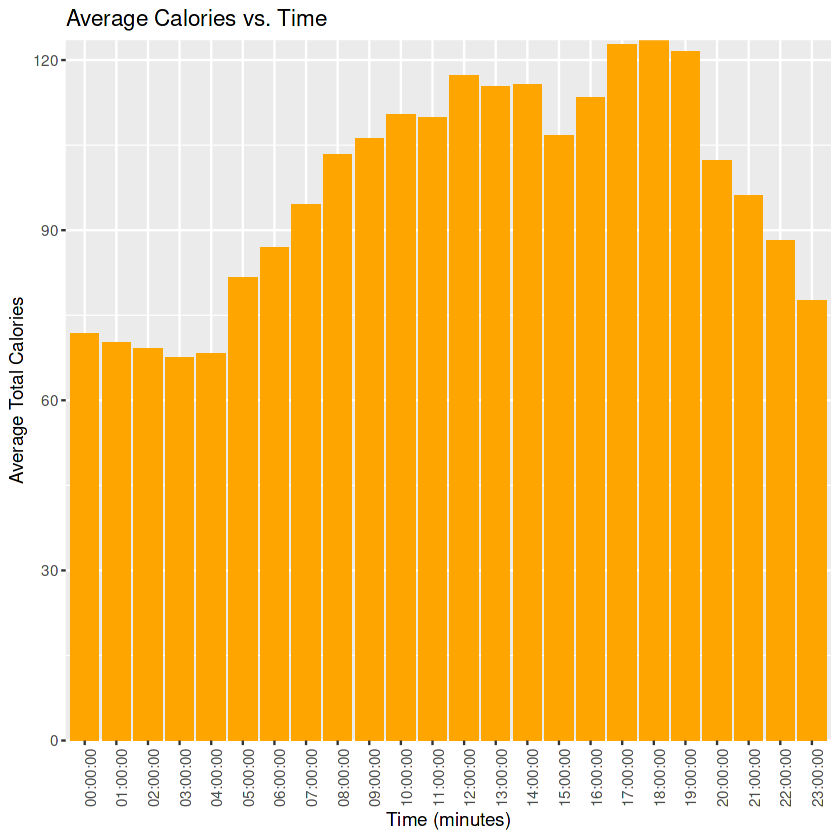

In [16]:
calories %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_cal = mean(Calories)) %>%
  ggplot(aes(x=time, y=mean_total_cal)) + geom_histogram(stat = "identity", fill = "orange") +
  theme(axis.text.x = element_text(angle = 90)) +
  scale_y_continuous(expand = c(0, 0)) +
  labs(title="Average Calories vs. Time", x = "Time (minutes)", y = "Average Total Calories")

The amount of calories burned is almost a direct matchup with the total intensity which supports the idea that more exercise leads to more calories burned. 

## <span style="color:red"> Summary </span>

**1/2. What are some trends in smart device usage and how could these trends apply to Bellabeat customers?**

From the analysis there are three main trends; the time at which users are most active, the days at which users are most active on, the amount of sleep a user gets in relation to the amount of exercise they do and the speed at which a user gets to sleep related to the amount of exercise carried out.

* When looking at the times at which users are most active these tend to be at break times during the working week around 12:00 and straight after work 17:00 onwards. 

* The days at which users are most active tend to be at the beginning of the week on a Monday/Tuesday and on Saturdays with the least active day being on a Sunday.

* As expected there is a direct correlation between the amount of exercise someone performs in a day and the amount someone sleep that person gets.

* The relation between exercise and sleep goes further as to describe what could be described as the quality of sleep or the quickness to get to sleep. As a user does more exercise the more amount of time they spend in bed sleeping as apose to being awake in bed.

**3. How could these trends help influence Bellabeat marketing strategy?**
The trends described above could be used in multiple ways to help influence the Bellabeat marketing strategies. One such way could be targetting users at times when they are most physically active. This could be through app reminders or having interactive events (live) at these peak times. Another way in which these trends could be used in marketing strategy is to help support people in areas that they struggle. From the analysis it is clear that many of the users struggle to sleep, are inactive through most of the day and the majority of users do not meet the recommended daily number of steps. In order to get better results on get more engagement from users, Bellabeat could use these points as ways of relating to customers and talioring the service to best support these needs.

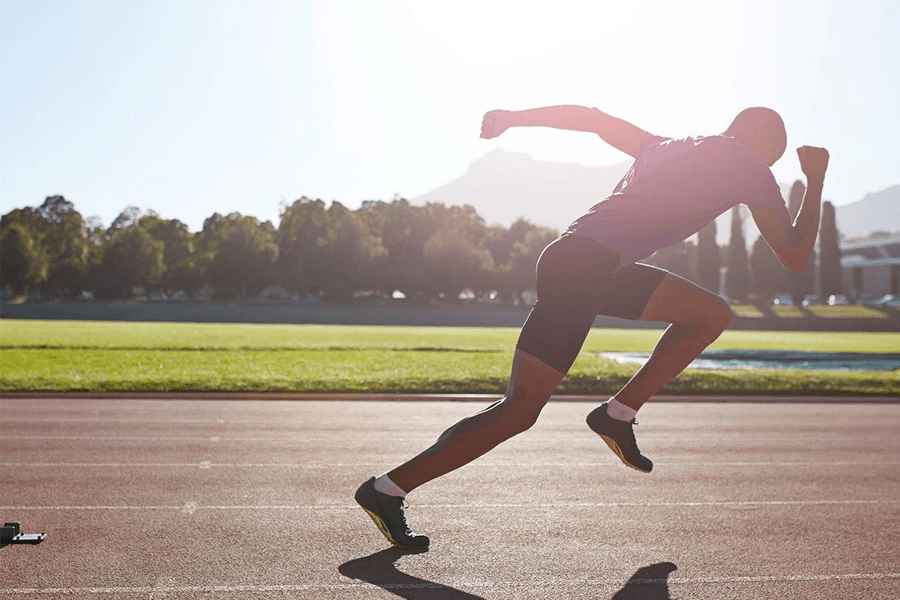